## Linear Regression
The loss function for training can be diferent than the performance measure for the model. The loss function needs to be something that makes optimization practical, and it may contain regularization, which is not part of the model, only part of the training.

A good metric is closely aligned to the business goal. A good training loss is easy to optimize and strongly correlated with the metric.

## Normal Equation
Normal equation is a closed form slotion to solve for the ideal theta (weights)
Theta = (X.t * X) ^ -1 * X.t * y

In [7]:
import numpy as np

np.random.seed(42)
m = 100 
X = 2 * np.random.rand(m,1)
y = 4 + 3 * X + np.random.randn(m,1)

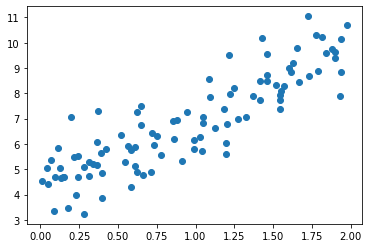

In [8]:
import matplotlib.pyplot as plt

plt.plot(X,y,"o")
plt.show()

In [9]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X)
# the @ operator performs matrix multiplication 
# A @ B is equivelent to np.matmul(A, B)
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

In [12]:
theta_best

array([[4.21509616],
       [2.77011339]])

The formula to generate the dots was y = 4 + 3x + noise
What we found was 4.2 + 2.77x. The noise made it impossible to find the correct equestion. The smaller and noisier the data set, the harder it is to recover the formula.

In [13]:
# We can make predictions now
X_new = np.array([[0],[2]])
X_new_b = add_dummy_feature(X_new) 
y_predict = X_new_b @ theta_best
y_predict

array([[4.21509616],
       [9.75532293]])

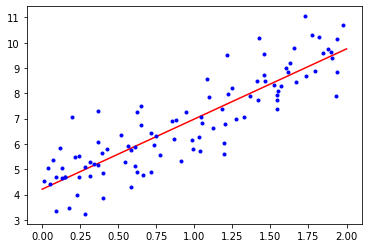

In [14]:
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(X, y, "b.")
plt.show()

In [15]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [16]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

In [17]:
np.linalg.pinv(X_b) @ y

array([[4.21509616],
       [2.77011339]])

## Gradient Descent

In [19]:
eta = 0.1
n_epochs = 1000
m = len(X_b)

np.random.seed(42)
theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    gradients = 2 / m * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * gradients

theta

array([[4.21509616],
       [2.77011339]])

### Stochastic Gradient Descent

In [24]:
n_epochs = 50
t0, t1 = 5, 50 

def learning_schedule(t):
    return t0 / (t + t1)

np.random.seed(42)
theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for iteration in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index + 1]
        yi = y[random_index : random_index + 1]
        gradients = 2 * xi.T @ (xi @ theta - yi)
        eta = learning_schedule(epoch * m + iteration)
        theta = theta - eta * gradients

In [25]:
theta

array([[4.21076011],
       [2.74856079]])

In [26]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-5, penalty=None, eta0=0.01,
                      n_iter_no_change=100, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(n_iter_no_change=100, penalty=None, random_state=42, tol=1e-05)

In [28]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.21278812]), array([2.77270267]))